<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Capstone: Credit Card Recommender

---
## Problem Statement
You've want to sign up for a credit card that best fits you, but you've realised that you will need to comb through all card descriptions, conditions and reviews in order to decide which card is the best. You find that it is very inconvenient and as a data scientist, you decide to take it upon yourself to build a credit card recommender.

Use different techniques to analyse the reviews, credit card conditions to derive a credit card recommender that could help to save a lot of time when choosing a credit card.

### Contents:
- [Background](#Background)
- [Datasets Used](#Datasets-Used)
- [Extraction of Data](#Extraction-of-Data)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Data Dictionary](#Data-Dictionary)
- [Pre-processing text data](#Pre-processing-text-data)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Sentiment Analysis Using BERT](#Sentiment-Analysis-Using-BERT)
- [Preparing the dataset for modelling](#Preparing-the-dataset-for-modelling)
- [Modelling](#Modelling)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

All credit cards in Singapore offer some sort of reward for using them for your purchases, which include incentives like cashback, reward points (which can be traded for air miles, discount vouchers or actual products), or airline miles. However, the most common reward, and perhaps the most enticing, would perhaps be cashback.

For the uninitiated, cashback refers to receiving back a percentage of what you spend in the form of money. It is akin to getting a perpetual discount whenever you spend. Sounds too good to be true? It really is not. Credit card companies are constantly competing to provide the most competitive rewards for their customers - some cards offer lucrative sign-up promotions, while others offer higher cashbacks for niche spending categories like travel or sustainability.

With so many cards available on the market to choose from, it is no wonder that Singaporeans have a hard time deciding which is the best credit card in Singapore. In particular, it is hard to compare the different cashback rewards across multiple categories for various credit cards. [(source)](https://sg.news.yahoo.com/three-reasons-why-own-credit-104237659.html)

## Datasets Used

Data in this used in the analysis consists of credit card details and reviews scrapped from various websites. Please rerefer to the data dictionary for more information on the columns extracted.

## Extraction of Data

Please refer to "**1. Extraction of Data**" for the steps done for data extraction.

## Data Import and Cleaning

Please refer to "**2. Analysis of Datasets**" for the steps done for data import and cleaning.

## Data Dictionary

<br>**Dataset name: `cashback_expand_df`**
<br>This dataset contains all the reviews on cashback credit cards.

| Feature | Type | Dataset | Description |
|:--|:-:|:-:|:--|
|credit_card_name|string|perfumes_df|Name of the credit card.|
|card_type|string|perfumes_df|Type of credit card. Cashback of Air Miles.|
|reviews|string|perfumes_df|Reviews on the credit cards.|


<br>**Dataset name: `miles_expand_df`**
<br>This dataset contains all the reviews on air miles credit cards.

| Feature | Type | Dataset | Description |
|:--|:-:|:-:|:--|
|credit_card_name|string|perfumes_df|Name of the credit card.|
|card_type|string|perfumes_df|Type of credit card. Cashback of Air Miles.|
|reviews|string|perfumes_df|Reviews on the credit cards.|

<br>**Dataset name: `combined_expand_df`**
<br>This dataset contains all the reviews on all credit cards.

| Feature | Type | Dataset | Description |
|:--|:-:|:-:|:--|
|credit_card_name|string|perfumes_df|Name of the credit card.|
|card_type|string|perfumes_df|Type of credit card. Cashback of Air Miles.|
|reviews|string|perfumes_df|Reviews on the credit cards.|

## Pre processing text data

Please refer to "**2. Analysis of Datasets**" for the steps done for pre-processing data.

## Exploratory Data Analysis

Please refer to "**2. Analysis of Datasets**" for the steps done for exploratory data analysis.

## Sentiment Analysis Using BERT

Please refer to "**2. Analysis of Datasets**" for the steps done for sentiment analysis.

## Modelling

**1. Importing of libraries**

In [13]:
# Import libraries
import pandas as pd
import string
import re
import nltk
import numpy as np
import pandas as pd
import sklearn
import pickle

# Chart plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

# Streamlit
import streamlit as st
import streamlit.components.v1 as components

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

**2. Convert features into numerical format**

In order to perform modelling, we will have to convert our dataset back into multiple-choice format.

In [66]:
#Check the files you have (adjust the file paths based on your project structure)
cashback_questionaire_df = pd.read_csv('dataset/2.cashback_expand_df.csv')
miles_questionaire_df = pd.read_csv('dataset/2.miles_expand_df.csv')



In [67]:
# Combine the two datasets into one combined dataset
combined_questionaire_df = pd.concat([cashback_questionaire_df, miles_questionaire_df], ignore_index=True)

# Check the total number of rows to ensure that the dataset has been merged correctly
print(f"Combined dataset shape: {combined_questionaire_df.shape}")
display(combined_questionaire_df.head())


Combined dataset shape: (427, 8)


,Card,Review,Review_cleaned,card_type,Review_tokenized,Review_no_stop,Review_lemmatized,sentiment
0,UOB One Card,I have had my own story of crypto scams due to...,i have had my own story of crypto scams due to...,Cashback,"['i', 'have', 'had', 'my', 'own', 'story', 'of...","['story', 'crypto', 'scams', 'due', 'referrals...","['story', 'crypto', 'scam', 'due', 'referral',...",1
1,UOB One Card,Good credit card to provide higher interest ra...,good credit card to provide higher interest ra...,Cashback,"['good', 'credit', 'card', 'to', 'provide', 'h...","['good', 'credit', 'card', 'provide', 'higher'...","['good', 'credit', 'card', 'provide', 'higher'...",4
2,UOB One Card,Applied for this card years back along with on...,applied for this card years back along with on...,Cashback,"['applied', 'for', 'this', 'card', 'years', 'b...","['applied', 'card', 'years', 'back', 'along', ...","['applied', 'card', 'year', 'back', 'along', '...",5
3,UOB One Card,Pair up this card with the UOB ONE Savings acc...,pair up this card with the uob one savings acc...,Cashback,"['pair', 'up', 'this', 'card', 'with', 'the', ...","['pair', 'card', 'uob', 'one', 'savings', 'acc...","['pair', 'card', 'uob', 'one', 'saving', 'acco...",4
4,UOB One Card,The longest CC I have. It is a great card to u...,the longest cc i have it is a great card to us...,Cashback,"['the', 'longest', 'cc', 'i', 'have', 'it', 'i...","['longest', 'cc', 'great', 'card', 'use', 'use...","['longest', 'cc', 'great', 'card', 'use', 'use...",5


In [68]:
# Convert 'card_type' to one-hot encoded format
card_type_onehot = pd.get_dummies(combined_questionaire_df['card_type'], prefix='card_type')

# Concatenate the one-hot encoded columns back into the original dataframe
combined_questionaire_df = pd.concat([combined_questionaire_df, card_type_onehot], axis=1)

# Drop the original 'card_type' column since it's now encoded
combined_questionaire_df.drop('card_type', axis=1, inplace=True)

# Display the updated dataset
print("Updated Dataset with One-Hot Encoding:")
display(combined_questionaire_df.head())


Updated Dataset with One-Hot Encoding:


,Card,Review,Review_cleaned,Review_tokenized,Review_no_stop,Review_lemmatized,sentiment,card_type_Air Miles,card_type_Cashback
0,UOB One Card,I have had my own story of crypto scams due to...,i have had my own story of crypto scams due to...,"['i', 'have', 'had', 'my', 'own', 'story', 'of...","['story', 'crypto', 'scams', 'due', 'referrals...","['story', 'crypto', 'scam', 'due', 'referral',...",1,0,1
1,UOB One Card,Good credit card to provide higher interest ra...,good credit card to provide higher interest ra...,"['good', 'credit', 'card', 'to', 'provide', 'h...","['good', 'credit', 'card', 'provide', 'higher'...","['good', 'credit', 'card', 'provide', 'higher'...",4,0,1
2,UOB One Card,Applied for this card years back along with on...,applied for this card years back along with on...,"['applied', 'for', 'this', 'card', 'years', 'b...","['applied', 'card', 'years', 'back', 'along', ...","['applied', 'card', 'year', 'back', 'along', '...",5,0,1
3,UOB One Card,Pair up this card with the UOB ONE Savings acc...,pair up this card with the uob one savings acc...,"['pair', 'up', 'this', 'card', 'with', 'the', ...","['pair', 'card', 'uob', 'one', 'savings', 'acc...","['pair', 'card', 'uob', 'one', 'saving', 'acco...",4,0,1
4,UOB One Card,The longest CC I have. It is a great card to u...,the longest cc i have it is a great card to us...,"['the', 'longest', 'cc', 'i', 'have', 'it', 'i...","['longest', 'cc', 'great', 'card', 'use', 'use...","['longest', 'cc', 'great', 'card', 'use', 'use...",5,0,1


**3. Convert target column into numerical format**

Since the model isn't able to read text, we will also need to convert our target column into numerical format.

Missing labels after mapping: 0


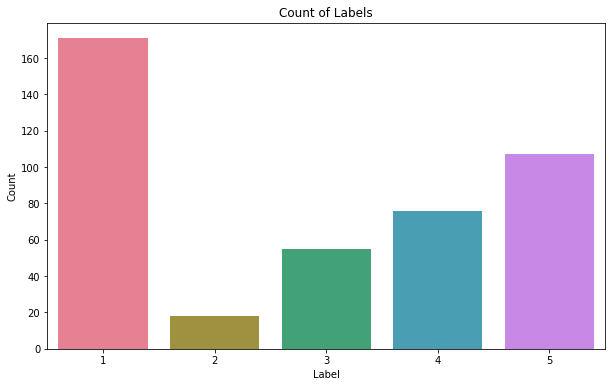

In [69]:
# Step 1: Map the card names to numeric labels
combined_questionaire_df['label'] = combined_questionaire_df['Card'].map({
    'UOB One Card': 1, 
    'UOB Ladys Card': 2, 
    'HSBC Revolution Credit Card': 3, 
    'Citi PremierMiles Visa Card': 4,
    'DBS Altitude Visa Signature Card': 5
})

# Step 2: Check if there are any missing labels after mapping
missing_labels = combined_questionaire_df['label'].isna().sum()
print(f"Missing labels after mapping: {missing_labels}")

# Step 3: Handle missing values (if any)
combined_questionaire_df['label'].fillna(0, inplace=True)  # Use 0 for unknown cards

# Step 4: Plot the count of each label
plt.figure(figsize=(10, 6))  # Set the size of the plot
label_cat = sns.countplot(x='label', data=combined_questionaire_df, palette='husl')
plt.title('Count of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [86]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Encode the card names
encoder = LabelEncoder()
combined_questionaire_df['Card_encoded'] = encoder.fit_transform(combined_questionaire_df['Card'])

# Use TfidfVectorizer to transform text data into numerical format
vectorizer = TfidfVectorizer(max_features=1000)  # Limiting features for simplicity
X_text = vectorizer.fit_transform(combined_questionaire_df['Review_no_stop'].astype(str))

# Combine the numerical features with the encoded card column
X = X_text.toarray()  # Convert sparse matrix to dense
y = combined_questionaire_df['Card_encoded']  # Target column

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

Now that we have prepared the dataset, let'start with modelling.

**4. Modelling**

We will use the below models to make the prediction:
- K Nearest Neighbour
- Random Forest Classifier
- Ada Boost Classifier
- Gradient Boost Classifier

**K Nearest Neighbour**

In [94]:
# Step 5: Instantiate and Fit the KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 6: Evaluate the model using Cross-Validation
print(f'KNN Cross Validation Score: {round(cv_score, 3)}')

# Step 7: Predict on the test set and evaluate the accuracy
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'KNN Test Score: {round(accuracy, 3)}')

KNN Cross Validation Score: 0.666
KNN Test Score: 0.71


**Random Forest Classifier**

In [93]:
# Train the Random Forest Model
rf = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=42)
rf.fit(X_train, y_train)

# Derive the cross-val score for training set
print(f'Random Forest Cross Validation Score: {round(cv_score_rf, 3)}')

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Check the test score
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Test Score: {round(test_accuracy_rf, 3)}')


Random Forest Cross Validation Score: 0.741
Random Forest Test Score: 0.766


**Ada Boost Classifier**

In [92]:
# Train the Ada Boost Model
ab = AdaBoostClassifier(n_estimators=100)
ab.fit(X_train, y_train)

# Derive the cross-val score for training set
print(f'Ada Boost Cross Validation Score: {round(cross_val_score(ab, X_train, y_train, cv=5).mean(),3)}')

# Check the test score
y_pred_ab = ab.predict(X_test)
print(f'Ada Boost Test Score: {round(accuracy_score(y_test, y_pred_ab),3)}')

Ada Boost Cross Validation Score: 0.616
Ada Boost Test Score: 0.654


**Gradient Boost Classifier**

In [91]:
# Train the Gradient Boost Model
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)

# Derive the cross-val score for training set
print(f'Gradient Boost Cross Validation Score: {round(cross_val_score(gb, X_train, y_train, cv=5).mean(),3)}')

# Check the test score
y_pred_gb = gb.predict(X_test)
print(f'Gradient Boost Test Score: {round(accuracy_score(y_test, y_pred_gb),3)}')

Gradient Boost Cross Validation Score: 0.762
Gradient Boost Test Score: 0.738


**Train-Test Summary Score:**

The scores are as per below:

| Model | Train Results | Test Results |
|:--|:-:|:-:|
|K Nearest Neighbour|0.666|0.71|
|**<font color = green>Random Forest</font>**|**<font color = green>0.741</font>**|**<font color = green>0.766</font>**|
|Ada Boost|0.616|0.654|
|Gradient Boost|0.762|0.738|

The first round of train and test results looks rather promosing. The best performing model is the Random Forest Classifier with a train result of 0.943 and a test result of 0.945. Gradient Boost Classifier had a higher train result of 0..953 but there seems to be overfitting as the difference between the train result and test result is more than 0.1.

**5. Addressing Class Imbalance using Smote**

SMOTE stands for Synthetic Minority Oversampling Technique. SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together. [(source)](https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/)

Due to imbalanced data, it is possible to make a model that appears very accurate, while it actually is useless. This is because traditional machine learning models and evaluation metrics that assume a balanced class distribution.

In [95]:
# Value counts before applying smote
print('Distribution before applying SMOTE:')
print(y_train.value_counts().to_string())

#Oversampling the data
smote = SMOTE(random_state = 42, k_neighbors = 3)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("\n")

# Check that smote has been applied to X_train and y_train
print('Distribution after applying SMOTE:')
print(y_train_smote.value_counts().to_string())

Distribution before applying SMOTE:
4    128
1     80
0     57
2     41
3     14


Distribution after applying SMOTE:
4    128
1    128
0    128
2    128
3    128


**K Nearest Neighbour**

In [96]:
# Instantiate a class instance of KNN class with an initial parameter value
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)

# Derive the cross-val score for training set
print(f'KNN Cross Validation Score: {round(cross_val_score(knn, X_train, y_train, cv=5).mean(),3)}')

# Check the test score
print(f'KNN Test Score: {round(knn.score(X_test, y_test),3)}')

KNN Cross Validation Score: 0.666
KNN Test Score: 0.355


**Random Forest Classifier**

In [98]:
# Train the Random Forest Model
rf = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Derive the cross-val score for training set
cv_score_rf = cross_val_score(rf, X_train, y_train, cv=5).mean()
print(f'Random Forest Cross Validation Score: {round(cv_score_rf, 3)}')

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Check the test score
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Test Score: {round(test_accuracy_rf, 3)}')


Random Forest Cross Validation Score: 0.741
Random Forest Test Score: 0.766


**Ada Boost Classifier**

In [99]:
# Train the Ada Boost Model
ab = AdaBoostClassifier(n_estimators=100)
ab.fit(X_train_smote, y_train_smote)

# Derive the cross-val score for training set
print(f'Ada Boost Cross Validation Score: {round(cross_val_score(ab, X_train, y_train, cv=5).mean(),3)}')

# Check the test score
y_pred_ab = ab.predict(X_test)
print(f'Ada Boost Test Score: {round(accuracy_score(y_test, y_pred_ab),3)}')

Ada Boost Cross Validation Score: 0.616
Ada Boost Test Score: 0.626


**Gradient Boost Classifier**

In [100]:
# Train the Gradient Boost Model
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train_smote, y_train_smote)

# Derive the cross-val score for training set
print(f'Gradient Boost Cross Validation Score: {round(cross_val_score(gb, X_train, y_train, cv=5).mean(),3)}')

# Check the test score
y_pred_gb = gb.predict(X_test)
print(f'Gradient Boost Test Score: {round(accuracy_score(y_test, y_pred_gb),3)}')

Gradient Boost Cross Validation Score: 0.775
Gradient Boost Test Score: 0.757


**Train-Test Summary Score (After Applying Smote):**

| Model | Train Results | Test Results |
|:--|:-:|:-:|
| K Nearest Neighbour Classifier | 0.666 | 0.355 |
| **<font color = green>Random Forest Classifier</font>** | **<font color = green>0.741</font>** | **<font color = green>0.766</font>** |
| Ada Boost Classifier | 0.616 | 0.626 |
| Gradient Boost Classifier | 0.775 | 0.757 |


After applying SMOTE, the all the test scores have decreased. This could be due to the class imbalance which have been addressed by applying SMOTE. Gradient Boost Classifier seems to be the best performing model now with a train result of 0.953 and a test result of 0.938. Ada Boost Classifier seems to be severly overfitted as the difference between the train result and test result is almost 0.3.

Now, let's apply GridSearchCV to further optimise the models.

**6. Optimising the models using GridSearchCV**

**K Nearest Neighbour**

We have ran the above code and have obtained the these as the best parameters for K Nearest Neighbour:

`{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}`

We will load the above parameters into K Nearest Neighbour to generate the optimised model results.

In [112]:
# Instantiate a class instance of KNN class with an initial parameter value
knn = KNeighborsClassifier(n_neighbors=5, weights = 'distance', algorithm = 'auto', leaf_size = 10, p = 1 )
knn.fit(X_train_smote, y_train_smote)

# Derive the cross-val score for training set
print(f'KNN Cross Validation Score: {round(cross_val_score(knn, X_train, y_train, cv=5).mean(),3)}')

# Check the test score
print(f'KNN Test Score: {round(knn.score(X_test, y_test),3)}')

KNN Cross Validation Score: 0.684
KNN Test Score: 0.607


**Random Forest Classifier**

We have ran the above code and have obtained the these as the best parameters for Random Forest Classifier:

`{'max_depth': 50, 'min_samples_leaf': 1, 'n_estimators': 300}`

We will load the above parameters into Random Forest Classifier to generate the optimised model results.

In [108]:
# Train the Random Forest Model
rfr = RandomForestClassifier(n_estimators=300, max_features="log2", max_depth = 50, 
                            min_samples_leaf = 1, random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Derive the cross-val score for training set
print(f'Random Forest Cross Validation Score: {round(cross_val_score(rf, X_train, y_train, cv=5).mean(),3)}')

# Check the test score
y_pred_rf = rf.predict(X_test)
print(f'Random Forest Test Score: {round(accuracy_score(y_test, y_pred_rf),3)}')

Random Forest Cross Validation Score: 0.741
Random Forest Test Score: 0.766


**Ada Boost Classifier**

We have ran the above code and have obtained the these as the best parameters for Ada Boost Classifier:

`{'learning_rate': 1, 'n_estimators': 300}`

We will load the above parameters into Random Forest Classifier to generate the optimised model results.

In [110]:
# Train the Ada Boost Model
ab = AdaBoostClassifier(n_estimators=300, learning_rate = 1)
ab.fit(X_train_smote, y_train_smote)

# Derive the cross-val score for training set
print(f'Ada Boost Cross Validation Score: {round(cross_val_score(ab, X_train, y_train, cv=5).mean(),3)}')

# Check the test score
y_pred_ab = ab.predict(X_test)
print(f'Ada Boost Test Score: {round(accuracy_score(y_test, y_pred_ab),3)}')

Ada Boost Cross Validation Score: 0.625
Ada Boost Test Score: 0.607


**Gradient Boost Classifier**

We have ran the above code and have obtained the these as the best parameters for Gradient Boost Classifier:

`{'learning_rate': 0.4, 'loss': 'log_loss', 'n_estimators': 200, 'subsample': 0.5}`

We will load the above parameters into Gradient Boost Classifier to generate the optimised model results.

In [114]:
# Train the Gradient Boost Model
gb = GradientBoostingClassifier(n_estimators = 200, loss = 'log_loss', subsample = 0.5, learning_rate = 0.4)
gb.fit(X_train_smote, y_train_smote)

# Derive the cross-val score for training set
print(f'Gradient Boost Cross Validation Score: {round(cross_val_score(gb, X_train, y_train, cv=5).mean(),3)}')

# Check the test score
y_pred_gb = gb.predict(X_test)
print(f'Gradient Boost Test Score: {round(accuracy_score(y_test, y_pred_gb),3)}')

Gradient Boost Cross Validation Score: 0.778
Gradient Boost Test Score: 0.738


**Train-Test Summary Score (After Performing GridSearchCV):**

| Model | Train Results | Test Results |
|:--|:-:|:-:|
|K Nearest Neighbour|0.684|0.607|
|**<font color = green>Random Forest Classifier</font>**|**<font color = green>0.741</font>**|**<font color = green>0.766</font>**|
|Ada Boost Classifier|0.625|0.607|
|Gradient Boost Classifier|0.778|0.738|

After performing GridSearchCV, Gradient Boost Classifier has the best performing train and test with a result of 0.778 and 0.738 respectively. However, we would choose Random Forest Classifier as our preferred choice of model. This is because the restuls for the Random Forest Classifier is also relatively good with a train and test result of 0.741 and 0.766 respectively. However, the model takes considerably lesser time to run. Considering that we will be deploying this on a live website, a faster model will be preferred as user experience will definitely be better. Since the results are not significantly different, we would choose the slightly less accurate but faster model as our preferred choice. 

## Conclusions and Recommendations

### Key Takeaways
- Recommender deployed successfully on https://keycards.herokuapp.com/
- The recommender is fuss free way to select the best suited credit cards. The recommender uses a Random Forest Model with a model accuracy of 77%.
- Besides card return, customers service is also quite an important factor when determining a good credit card

### Limitations and Future Enhancements

- Analysis is only limited to all the reviews that have been successfully scrapped. Suggest extracting reviews from other sites as well.
- Recommender only has 8 cards at the moment. To include more credit cards in the future.
- Recommender could be scaled to include credit cards for other countries.